# Test script for NPP data

Hilary Palevsky's update of the Hello World example notebook with documentation on how to access CMIP data.

In [24]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

import numpy as np
import matplotlib.pyplot as plt

## Demonstrate how to use `intake-esm`
[Intake-esm](https://intake-esm.readthedocs.io) is a data cataloging utility that facilitates access to CMIP data. It's pretty awesome.

An `intake-esm` collection object establishes a link to a database that contains file locations and associated metadata (i.e. which experiement, model, etc. thet come from). 

### Opening a collection
First step is to open a collection by pointing to the collection definition file, which is a JSON file that conforms to the [ESM Collection Specification](https://github.com/NCAR/esm-collection-spec). 

The collection JSON files are stored locally in this repository for purposes of reproducibility---and because Cheyenne compute nodes don't have Internet access. 

The primary source for these files is the [intake-esm-datastore](https://github.com/NCAR/intake-esm-datastore) repository. Any changes made to these files should be pulled from that repo. For instance, the Pangeo cloud collection is available [here](https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json).

In [2]:
# This if/else is kept to maintain inter-operability across the different cloud platforms
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

glade-cmip6-ESM Collection with 687919 entries:
	> 12 activity_id(s)

	> 24 institution_id(s)

	> 47 source_id(s)

	> 66 experiment_id(s)

	> 162 member_id(s)

	> 35 table_id(s)

	> 1027 variable_id(s)

	> 12 grid_label(s)

	> 59 dcpp_init_year(s)

	> 246 version(s)

	> 6667 time_range(s)

	> 687919 path(s)

`intake-esm` is build on top of [pandas](https://pandas.pydata.org/pandas-docs/stable). It is possible to view the `pandas.DataFrame` as follows.

In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,day,pr,gn,NaN,v20190702,20150101-20551231,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,hfls,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,prsn,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,va,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,tas,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


It is possible to interact with the `DataFrame`; for instance, we can see what the "attributes" of the datasets are by printing the columns.

In [4]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'dcpp_init_year',
       'version', 'time_range', 'path'],
      dtype='object')

### Search and discovery

#### Finding unique entries
Let's query the data to see what models ("source_id"), experiments ("experiment_id") and temporal frequencies ("table_id") are available.

In [5]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 66,
                   'values': ['ssp370', 'histSST-piNTCF', 'histSST',
                              'histSST-1950HC', 'hist-1950HC', 'hist-piNTCF',
                              'piClim-NTCF', 'ssp370SST-lowNTCF',
                              'ssp370-lowNTCF', 'ssp370SST', 'hist-bgc',
                              'esm-ssp585', 'amip-future4K', 'amip-m4K',
                              'a4SST', 'aqua-p4K', 'piSST', 'amip-4xCO2',
                              'a4SSTice', 'amip-p4K', 'aqua-control',
                              'aqua-4xCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', '1pctCO2', 'esm-piControl',
                              'esm-hist', 'ssp245', 'ssp585', 'ssp126',
                              'hist-GHG', 'hist-aer', 'dcppA-hindcast',
                              'dcppC-hindcast-noPinatubo',
                              'dcppC-hindcast-noElChichon', 'dcppA-assim',
                              'dcp

#### Searching for specific datasets

Let's find all the integrated primary productivity (intpp) at monthly frequency (Omon) from the ocean for the `historical` and `ssp585` experiments. Note that data are currently available only at monthly, not at annual frequency.

In [6]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Omon', variable_id='intpp', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
23905,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,intpp,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
24643,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,intpp,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
25379,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,intpp,gn,NaN,v20181206,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
26216,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,intpp,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
26911,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,intpp,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
...,...,...,...,...,...,...,...,...,...,...,...,...
640543,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,intpp,gn,NaN,v20190710,206001-206412,/glade/collections/cmip/CMIP6/ScenarioMIP/DKRZ...
640544,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,intpp,gn,NaN,v20190710,207001-207412,/glade/collections/cmip/CMIP6/ScenarioMIP/DKRZ...
640545,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,intpp,gn,NaN,v20190710,210001-210012,/glade/collections/cmip/CMIP6/ScenarioMIP/DKRZ...
640546,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,intpp,gn,NaN,v20190710,208501-208912,/glade/collections/cmip/CMIP6/ScenarioMIP/DKRZ...


It might be desirable to get more specific. For instance, we may want to select only the models that have *both* `historical` and `ssp585` data. We coud do this as follows.

In [7]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical', 'ssp585']:
    query = dict(experiment_id=experiment_id, table_id='Omon', 
                 variable_id='intpp', grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included when working with oxygen data - otherwise this line is not needed
#models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['UKESM1-0-LL', 'CNRM-ESM2-1', 'IPSL-CM6A-LR']

In [8]:
#Edited from the original hello_world code to specify the ensemble member id (think this is the first one, based on conversation with Andrea)
# Note that this excludes models that don't have this member id - future work would calculate the ensemble mean for each model & scenario so as to not lose usable output
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Omon', member_id = 'r1i1p1f1', 
                 variable_id='intpp', grid_label='gn', source_id=models)
cat.df

# 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
535414,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Omon,intpp,gn,NaN,v20180803,185001-201412,/glade/collections/cmip/CMIP6/CMIP/IPSL/IPSL-C...
687642,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,Omon,intpp,gn,NaN,v20190119,201501-210012,/glade/collections/cmip/CMIP6/ScenarioMIP/IPSL...


### Loading data

`intake-esm` enables loading data directly into an [xarray.Dataset](http://xarray.pydata.org/en/stable/api.html#dataset).

Note that data on the cloud are in 
[zarr](https://zarr.readthedocs.io/en/stable/) format and data on 
[glade](https://www2.cisl.ucar.edu/resources/storage-and-file-systems/glade-file-spaces) are stored as 
[netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. This is opaque to the user.

`intake-esm` has rules for aggegating datasets; these rules are defined in the collection-specification file.

In [9]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


`dset_dict` is a dictionary of `xarray.Dataset`'s; its keys are constructed to refer to compatible groups.

In [10]:
dset_dict.keys()

dict_keys(['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.Omon.gn'])

We can access a particular dataset and make a test plot as follows.

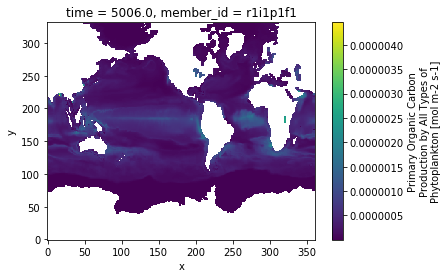

In [23]:
ds_ipsl_hist = dset_dict['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']

ds_ipsl_hist.intpp.isel(member_id = 0, time=164).plot()

### More advanced queries

As motivation for diving into more advanced manipulations with `intake-esm`, let's consider the task of getting access to grid information in the `Ofx` table_id.

In [12]:
cat_fx = col.search(experiment_id=['historical', 'ssp585'], source_id=models, table_id='Ofx', grid_label='gn')
cat_fx.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
23665,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,areacello,gn,NaN,v20190125,NaN,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
23666,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,deptho,gn,NaN,v20190125,NaN,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
24506,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,masscello,gn,NaN,v20190125,NaN,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
24507,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,hfgeou,gn,NaN,v20190125,NaN,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
24508,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,basin,gn,NaN,v20190125,NaN,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
...,...,...,...,...,...,...,...,...,...,...,...,...
628466,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r5i1p1f2,Ofx,areacello,gn,NaN,v20190410,NaN,/glade/collections/cmip/CMIP6/ScenarioMIP/CNRM...
628521,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r2i1p1f2,Ofx,areacello,gn,NaN,v20190410,NaN,/glade/collections/cmip/CMIP6/ScenarioMIP/CNRM...
687632,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,Ofx,areacello,gn,NaN,v20190119,NaN,/glade/collections/cmip/CMIP6/ScenarioMIP/IPSL...
687633,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,Ofx,hfgeou,gn,NaN,v20190119,NaN,/glade/collections/cmip/CMIP6/ScenarioMIP/IPSL...


We then drop duplicates.

In [13]:
df.drop_duplicates(subset=['source_id', 'variable_id'], inplace=True)

NameError: name 'df' is not defined

Now, since we've only retained one ensemble member, we need to eliminate that column. If we omit this step, `intake-esm` will throw an error, complaining that different variables are present for each ensemble member. Setting the `member_id` column to NaN precludes attempts to join along the ensemble dimension.

After this final manipulation, we copy the `DataFrame` back to the collection object and proceed with loading the data.

In [ ]:
df['member_id'] = np.nan
cat_fx.df = df

In [ ]:
fx_dsets = cat_fx.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}})

In [ ]:
fx_dsets.keys()

In [ ]:
for key, ds in fx_dsets.items():
    print(ds.data_vars)

## Demonstrate how spin-up a dask cluster

If you expect to require Big Data capabilities, here's how you spin up a [dask](https://dask.org) cluster using [dask-jobqueue](https://dask-jobqueue.readthedocs.io/en/latest/).

The syntax is different if on an NCAR machine versus the cloud.

In [14]:
if util.is_ncar_host():
    from ncar_jobqueue import NCARCluster
    cluster = NCARCluster(project='UCGD0006')
    cluster.adapt(minimum_jobs=1, maximum_jobs=10)
else:
    from dask_kubernetes import KubeCluster
    cluster = KubeCluster()
    cluster.adapt(minimum=1, maximum=10)
cluster

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [17]:
from dask.distributed import Client
client = Client(cluster) # Connect this local process to remote workers
client

Client Scheduler: tcp://10.148.10.15:43335 Dashboard: https://jupyterhub.ucar.edu/ch/user/palevsky/proxy/34679/status,Cluster Workers: 1 Cores: 36 Memory: 109.00 GB


Check which jobs are running (should be 1 Jupyter and 1-10 dask workers)

In [16]:
!qstat -u $USER


chadmin1.ib0.cheyenne.ucar.edu: 
                                                            Req'd  Req'd   Elap
Job ID          Username Queue    Jobname    SessID NDS TSK Memory Time  S Time
--------------- -------- -------- ---------- ------ --- --- ------ ----- - -----
8819752.chadmin palevsky shareex  Jupyter      4452   1   1    --  02:00 R 00:52
8820482.chadmin palevsky regular  dask-worke  45289   1  36  109gb 01:00 R 00:00


Close clusters at end of session when done with this notebook

In [ ]:
cluster.close()